                ****Customer segmentation with K means and Hierarchcal clustering **

In this kernal i will be making visualizations,eda and modelling and i will try to explain each of this clustering techinques and when to use them.if i have done any mistakes or wrongs please let me know in the comment section and please upvote if my kernal is helpful..Thank you!!!

['Mall_Customers.csv']


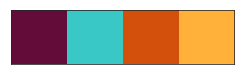

In [120]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
#set style of plots
sns.set_style('white')
np.random.seed(501)
#define a custom palette
customPalette = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139']
sns.set_palette(customPalette)
sns.palplot(customPalette)
import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [2]:
df=pd.read_csv("../input/Mall_Customers.csv")

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
def agelim(num):
    if(num<30):
        return "Youth"
    if((num>30)&(num<45)):
        return "middle"
    else:
        return "old"
    

In [8]:
df["age_lev"]=df["Age"].apply(agelim)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),age_lev
0,1,Male,19,15,39,Youth
1,2,Male,21,15,81,Youth
2,3,Female,20,16,6,Youth
3,4,Female,23,16,77,Youth
4,5,Female,31,17,40,middle


**Data Visualiztion**

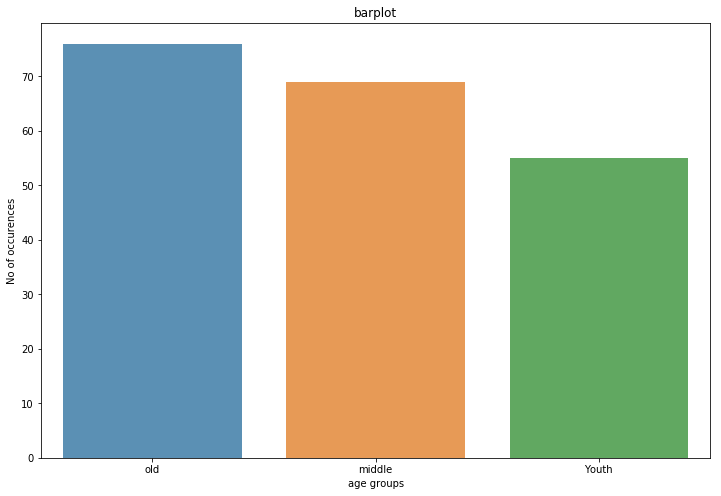

In [9]:
plt.figure(figsize=(12,8))
cnt=df['age_lev'].value_counts()
sns.barplot(x=cnt.index,y=cnt.values,alpha=0.8)
plt.xlabel("age groups")
plt.ylabel("No of occurences")
plt.title("barplot")
plt.show()

In [10]:
gender_per=df.Gender.value_counts()
gender_per

Female    112
Male       88
Name: Gender, dtype: int64

Text(0.5, 0, '% of Males and females')

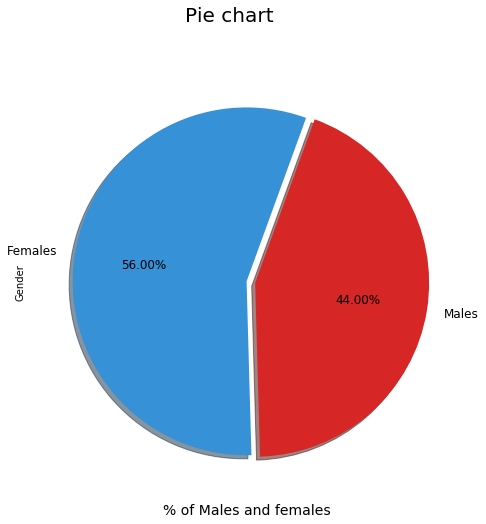

In [11]:
f, ax = plt.subplots( figsize=(16,8))
colors = ["#3791D7", "#D72626"]
labels ="Females", "Males"

plt.suptitle('Pie chart ', fontsize=20)

df["Gender"].value_counts().plot.pie(explode=[0,0.05], autopct='%1.2f%%', ax=ax, shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=70)



ax.set_xlabel('% of Males and females', fontsize=14)

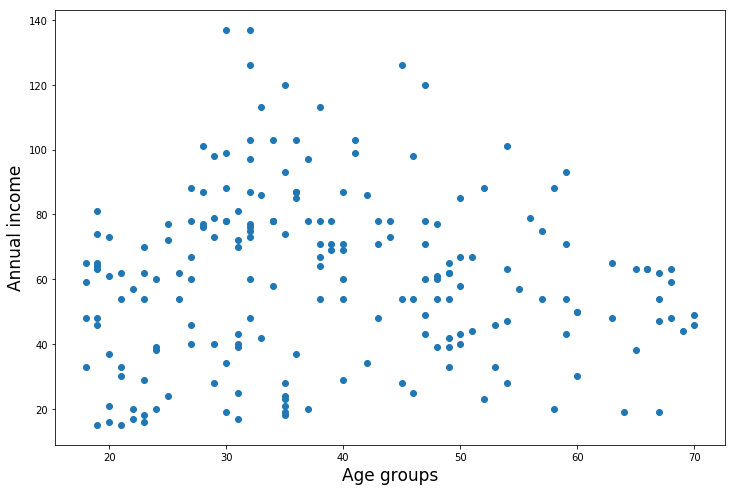

In [12]:
plt.figure(figsize=(12,8))
plt.scatter(x="Age",y="Annual Income (k$)",data=df)
plt.xlabel("Age groups",fontsize=17)
plt.ylabel("Annual income",fontsize=17)
plt.show()

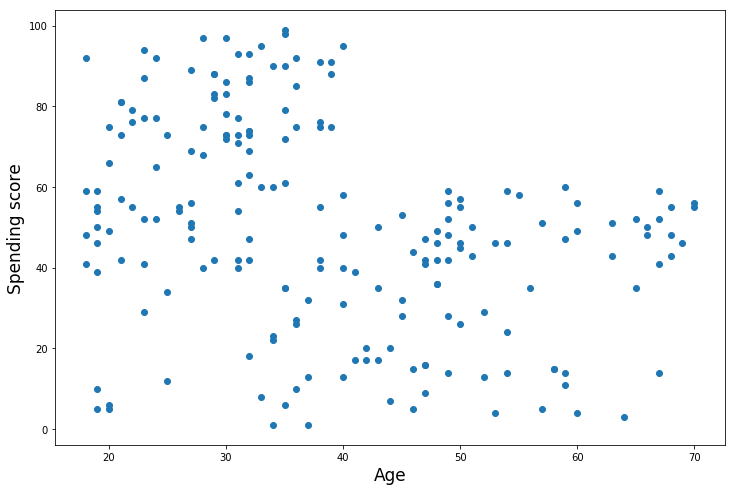

In [13]:
plt.figure(figsize=(12,8))
plt.scatter(x="Age",y="Spending Score (1-100)",data=df)
plt.xlabel("Age",fontsize=17)
plt.ylabel("Spending score",fontsize=17)
plt.show()

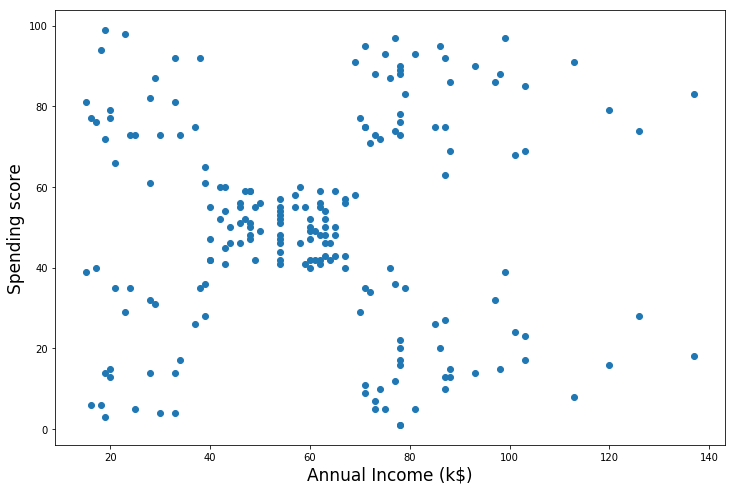

In [14]:
plt.figure(figsize=(12,8))
plt.scatter(x="Annual Income (k$)",y="Spending Score (1-100)",data=df)
plt.xlabel("Annual Income (k$)",fontsize=17)
plt.ylabel("Spending score",fontsize=17)
plt.show()

In [19]:
def changeage(s):
    if(s=='Male'):
        return 0
    else:
        return 1
df.Gender=df.Gender.apply(changeage)
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),age_lev
0,1,0,19,15,39,Youth
1,2,0,21,15,81,Youth
2,3,1,20,16,6,Youth
3,4,1,23,16,77,Youth
4,5,1,31,17,40,middle


OK till now we have seen data visualaiztion so lets go through the modelling.

Before going to do model first we need to understand what type of problem we are dealing with,yeah i know what you are thing this is clustering problem.
A clustering is a type of technique which is used to segregate the data in to the groups based on the common features,patterns,strucures...

There are mainly two type of clustering techniques most generally used .
1. K means clustering 
2. Hierarichal clustering

In this kernal i will create two models one is using K mean and another one is using Hierarichal clustering and seee how the results are!!!

**1. K means CLustering**

ok so what is k means clustering.K means is a type of clustering technique where we intially find k data points which are also called as centriods of the clusters and we measure the distance between these centroids and every data point in the data set and assign this data points to the centoid which is closer to it and once we assign each data points to its corresponding nearest centriod, we caluclate the mean of all centroid data points and this new mean act as new cetroid and after that repeat this process again and again until u get optimal points(centroids).

This approach is called the Lloyd – Forgy method!!!.

In [15]:
from sklearn import datasets # we need the iris dataset from here
from sklearn.cluster import KMeans # here is our main function
from sklearn.preprocessing import StandardScaler # this will reduce our mean to 0 and standard deviation to 1 for each feature
from sklearn.pipeline import make_pipeline # this helps us to apply a standard scaler to our k-means

In [74]:
df.iloc[:,1:5].head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


As i said earlier we need to find the cluster centers and make a model out of it but how we gonna do that there is a method called elbow method which is used to find the no of optimal clusters.In this elbow method we draw a graph between no of clusters and within cluster sum of squares(wcss) and we see where there is sudden decrease in WCSS,and it provides us the no of optimal custers.

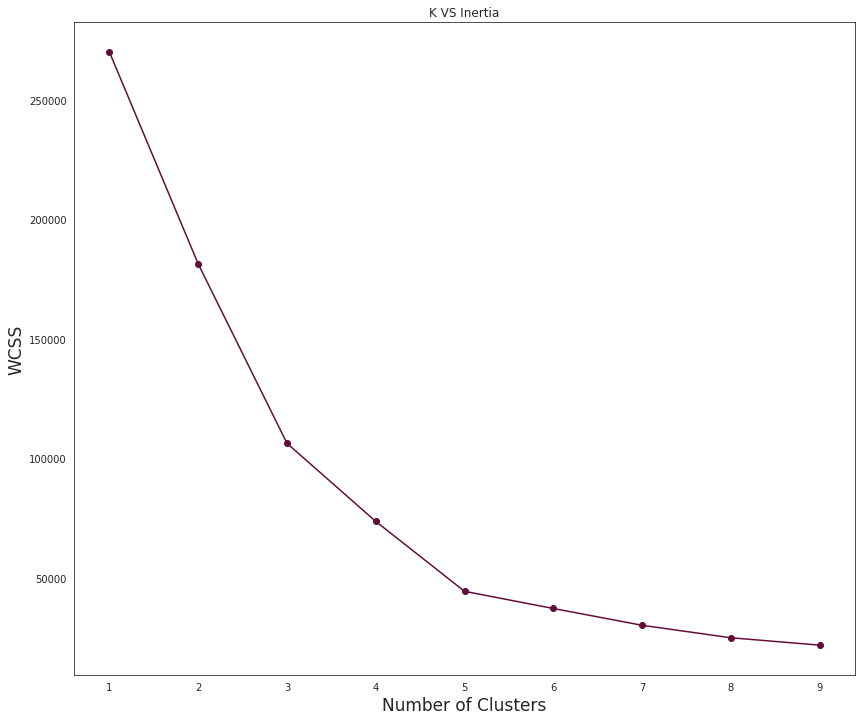

In [88]:
plt.figure(figsize=(14,12))
inertias = []

for k in range(1, 10):
    model = KMeans(n_clusters=k)
    model.fit(df.iloc[:,3:5].values)
    inertias.append(model.inertia_)
    
plt.plot(list(range(1, 10)), inertias, '-o')
plt.title('K VS Inertia')
plt.xlabel('Number of Clusters',fontsize='17')
plt.ylabel('WCSS',fontsize='17')
plt.show()

In [96]:
model1=KMeans(n_clusters= 5, init='k-means++', random_state=0)
model1.fit(df.iloc[:,3:5].values)
labels=model1.predict(df.iloc[:,3:5].values)
model1.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

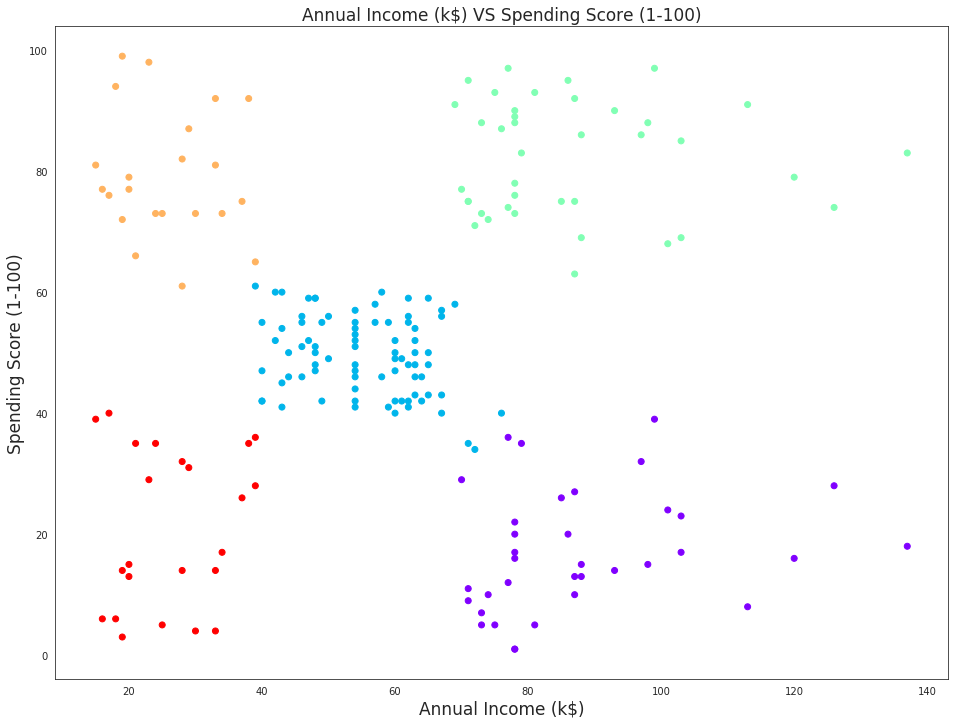

In [117]:

plt.figure(figsize=(16,12))
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'], c=labels, cmap='rainbow')
plt.xlabel('Annual Income (k$)',fontsize=17)
plt.ylabel('Spending Score (1-100)',fontsize=17)
plt.title('Annual Income (k$) VS Spending Score (1-100)',fontsize=17)
plt.show()

so we have seen k means clustering now we will see how Hierarchical Clustering helps us understand this data and see whether it can make better predictions than k means or not.

**2.Hierarchical Clustering**

Hierarchical clustering is a type of unsupervised learning which means it has no labels.it groups together the data points with similar characteristics like K-means clustering.
There are two types of hierarchical clustering.

1.**Agglomerative** :Data points are clustered using a bottom-up approach starting with individual data points.

2.**Divisive** :top-down approach is followed where all the data points are treated as one big cluster and the clustering process involves dividing the one big cluster into several small clusters.

In this kernal we will go through Agglomerative clustering.In this, algorithm starts with all the data points assigned to a cluster of their own and after that the two nearest data points merged together as one cluster and this newly formed cluster can be merged with a data point or another cluster wich is closest and this procees is repeated until there is only one cluster left.

In [ ]:
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

Like elbow method from the k means clustering we have Dendogram in Hierarchical clustering to find no of clusters

**Dendogram**

A dendogram is like a diagramaticc representation of how clusters are formed and it helps us finding the optimal no of clusters.
The decision of the no. of clusters that can best depict different groups can be chosen by observing the dendrogram. The best choice of the no. of clusters is the no. of vertical lines in the dendrogram cut by a horizontal line that can transverse the maximum distance vertically without intersecting a cluster.

Text(0.5, 0, 'cluster data points')

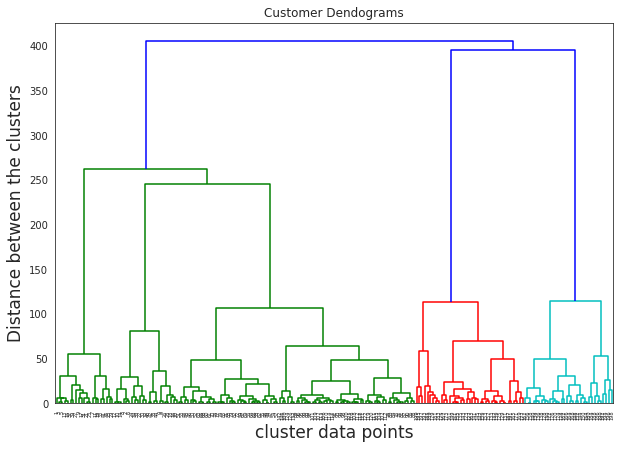

In [114]:

df1=df.iloc[:,3:5].values
plt.figure(figsize=(10, 7))  
plt.title("Customer Dendograms")  
dend = shc.dendrogram(shc.linkage(df1, method='ward'))  
plt.ylabel("Distance between the clusters",fontsize=17)
plt.xlabel("cluster data points",fontsize=17)

From the above graph we can see, if we draw a horizantal line through green and blue vertical lines we will be passing through **5** vertical lines and  transversing the maximum distance vertically without intersecting a cluster. so **5** is considerd to be  optimal no of clusters

In [93]:

model2 = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
model2.fit_predict(df1)  

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

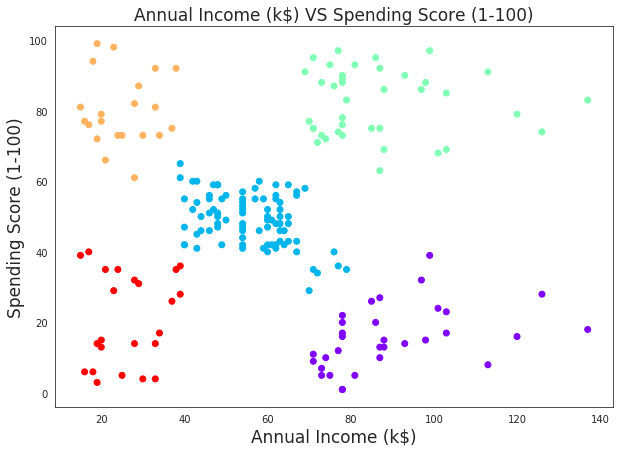

In [118]:
plt.figure(figsize=(10, 7))  
plt.scatter(df1[:,0], df1[:,1], c=model2.labels_, cmap='rainbow') 
plt.xlabel('Annual Income (k$)',fontsize=17)
plt.ylabel('Spending Score (1-100)',fontsize=17)
plt.title('Annual Income (k$) VS Spending Score (1-100)',fontsize=17)
plt.show()

In [103]:
final_df=pd.DataFrame({'Column1':model1.labels_,'Column2':model2.labels_})
final_df.columns=["y1","y2"]
final_df.head()

,y1,y2
0,4,4
1,3,3
2,4,4
3,3,3
4,4,4


Since the data we are dealing with is unlabeled it is difficult to find the accuracy of the model, So i have grouped mode1 1 and 2 labels in to one data frame and checked how accurate it is by making comparison between the predicted labels.

In [112]:
c=final_df[final_df["y1"]==final_df["y2"]]
accuracy=round(c.shape[0]/final_df.shape[0],2)*100
accuracy


98.0